In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df1 = pd.read_csv(r"C:\Users\user\Desktop\과제\데이터 과학\term project\program\태양광 발전량 현황.csv", encoding = 'cp949')
df2 = pd.read_csv(r"C:\Users\user\Desktop\과제\데이터 과학\term project\program\17년도22년까지.csv", encoding = 'cp949')

# 원래의 출력 설정으로 복원
pd.set_option('display.max_rows', 10)  # 최대 10개의 행을 출력
pd.set_option('display.max_columns', 20)  # 최대 20개의 열을 출력
pd.set_option('display.max_colwidth', 50)  # 각 열의 최대 너비를 50으로 제한
pd.set_option('display.expand_frame_repr', False)  # 데이터프레임을 한 줄로 출력

In [3]:
df1

,날짜,발전기명,주소,설비용량(MW),일일발전량(Wh)
0,2017-01-01,광양항태양광,전남 광양시 도이동 775,2.3,4365000
1,2017-01-02,광양항태양광,전남 광양시 도이동 775,2.3,3974400
2,2017-01-03,광양항태양광,전남 광양시 도이동 775,2.3,4361400
3,2017-01-04,광양항태양광,전남 광양시 도이동 775,2.3,3960000
4,2017-01-05,광양항태양광,전남 광양시 도이동 775,2.3,2431800
...,...,...,...,...,...
10567,2022-12-27,울산태양광#1,울산시 남구 용잠로 623,0.5,1782960
10568,2022-12-28,울산태양광#1,울산시 남구 용잠로 623,0.5,1413456
10569,2022-12-29,울산태양광#1,울산시 남구 용잠로 623,0.5,1752432
10570,2022-12-30,울산태양광#1,울산시 남구 용잠로 623,0.5,1582416


In [4]:
category_counts = df1['발전기명'].value_counts()

In [5]:
category_counts

발전기명
광양항태양광           2191
당진태양광            2186
수원환경사업소태양광       2185
울산태양광#1          2183
동해시하수종말처리장태양광    1827
Name: count, dtype: int64

In [6]:
df2

,지점,지점명,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),강수 계속시간(hr),10분 최다 강수량(mm),...,평균 20cm 지중온도(°C),평균 30cm 지중온도(°C),0.5m 지중온도(°C),1.0m 지중온도(°C),1.5m 지중온도(°C),3.0m 지중온도(°C),5.0m 지중온도(°C),합계 대형증발량(mm),합계 소형증발량(mm),9-9강수(mm)
0,106,동해,2017-01-01,7.1,1.4,553.0,12.1,1250.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,106,동해,2017-01-02,10.0,6.1,122.0,14.2,1157.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,106,동해,2017-01-03,8.2,5.6,853.0,12.2,1441.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,106,동해,2017-01-04,7.7,3.0,2310.0,10.8,1019.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,106,동해,2017-01-05,4.0,2.0,647.0,5.9,413.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10950,266,광양시,2022-12-27,1.9,-2.7,533.0,8.0,1440.0,NaN,NaN,...,2.8,3.4,NaN,NaN,NaN,NaN,NaN,1.8,2.6,NaN
10951,266,광양시,2022-12-28,1.7,-1.3,157.0,6.5,1347.0,NaN,NaN,...,3.0,3.5,NaN,NaN,NaN,NaN,NaN,1.6,2.2,NaN
10952,266,광양시,2022-12-29,1.4,-3.1,744.0,7.6,1345.0,NaN,NaN,...,2.9,3.5,NaN,NaN,NaN,NaN,NaN,1.8,2.6,NaN
10953,266,광양시,2022-12-30,1.6,-2.5,444.0,6.7,1500.0,NaN,NaN,...,2.9,3.5,NaN,NaN,NaN,NaN,NaN,1.5,2.1,NaN


In [7]:
#두 데이터 셋을 합치기 위해, df2의 일시 칼럼명을 날짜로 변환
df2.rename(columns={'일시': '날짜'}, inplace=True)

# 병합 조건을 정의
merge_conditions = {
    "전남 광양시 도이동 775": "광양시"
}

# 지역 조건에 따른 매칭 컬럼 추가
df1['지역_매칭'] = df1['주소'].map(merge_conditions)
df2['지역_매칭'] = df2['지점명']

# '날짜'와 '지역_매칭' 컬럼을 기준으로 병합
Gwangyang_df = pd.merge(df1, df2, on=['날짜', '지역_매칭'], how='inner', suffixes=('_A', '_B'))

# 불필요한 '지역_매칭' 컬럼 제거
Gwangyang_df.drop(columns=['지역_매칭'], inplace=True)

In [8]:
Gwangyang_df

,날짜,발전기명,주소,설비용량(MW),일일발전량(Wh),지점,지점명,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),...,평균 20cm 지중온도(°C),평균 30cm 지중온도(°C),0.5m 지중온도(°C),1.0m 지중온도(°C),1.5m 지중온도(°C),3.0m 지중온도(°C),5.0m 지중온도(°C),합계 대형증발량(mm),합계 소형증발량(mm),9-9강수(mm)
0,2017-01-01,광양항태양광,전남 광양시 도이동 775,2.3,4365000,266,광양시,5.6,0.7,531.0,...,4.7,3.7,NaN,NaN,NaN,NaN,NaN,1.2,1.7,NaN
1,2017-01-02,광양항태양광,전남 광양시 도이동 775,2.3,3974400,266,광양시,8.9,4.0,34.0,...,5.9,4.6,NaN,NaN,NaN,NaN,NaN,1.7,2.4,NaN
2,2017-01-03,광양항태양광,전남 광양시 도이동 775,2.3,4361400,266,광양시,7.1,2.7,645.0,...,6.1,5.0,NaN,NaN,NaN,NaN,NaN,1.8,2.6,NaN
3,2017-01-04,광양항태양광,전남 광양시 도이동 775,2.3,3960000,266,광양시,7.1,2.8,326.0,...,5.9,4.8,NaN,NaN,NaN,NaN,NaN,1.7,2.4,NaN
4,2017-01-05,광양항태양광,전남 광양시 도이동 775,2.3,2431800,266,광양시,8.2,5.1,18.0,...,6.1,4.9,NaN,NaN,NaN,NaN,NaN,1.6,2.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2186,2022-12-27,광양항태양광,전남 광양시 도이동 775,2.3,4987800,266,광양시,1.9,-2.7,533.0,...,2.8,3.4,NaN,NaN,NaN,NaN,NaN,1.8,2.6,NaN
2187,2022-12-28,광양항태양광,전남 광양시 도이동 775,2.3,4334400,266,광양시,1.7,-1.3,157.0,...,3.0,3.5,NaN,NaN,NaN,NaN,NaN,1.6,2.2,NaN
2188,2022-12-29,광양항태양광,전남 광양시 도이동 775,2.3,5013000,266,광양시,1.4,-3.1,744.0,...,2.9,3.5,NaN,NaN,NaN,NaN,NaN,1.8,2.6,NaN
2189,2022-12-30,광양항태양광,전남 광양시 도이동 775,2.3,4122000,266,광양시,1.6,-2.5,444.0,...,2.9,3.5,NaN,NaN,NaN,NaN,NaN,1.5,2.1,NaN


In [9]:
Gwangyang_df.drop('발전기명', axis=1, inplace=True)
Gwangyang_df.drop('주소', axis=1, inplace=True)
Gwangyang_df.drop('지점', axis=1, inplace=True)
Gwangyang_df.drop('설비용량(MW)', axis=1, inplace=True)

In [10]:
# pandas 출력 옵션 설정: 생략 없이 출력
pd.set_option('display.max_rows', None)  # 모든 행을 출력
pd.set_option('display.max_columns', None)  # 모든 열을 출력
pd.set_option('display.max_colwidth', None)  # 모든 열의 최대 너비를 제한 없이 설정
pd.set_option('display.expand_frame_repr', False)  # 데이터프레임을 여러 줄로 나누어 출력

Gwangyang_df.dtypes

날짜                      object
일일발전량(Wh)                int64
지점명                     object
평균기온(°C)               float64
최저기온(°C)               float64
최저기온 시각(hhmi)          float64
최고기온(°C)               float64
최고기온 시각(hhmi)          float64
강수 계속시간(hr)            float64
10분 최다 강수량(mm)         float64
10분 최다강수량 시각(hhmi)     float64
1시간 최다강수량(mm)          float64
1시간 최다 강수량 시각(hhmi)    float64
일강수량(mm)               float64
최대 순간 풍속(m/s)          float64
최대 순간 풍속 풍향(16방위)      float64
최대 순간풍속 시각(hhmi)       float64
최대 풍속(m/s)             float64
최대 풍속 풍향(16방위)         float64
최대 풍속 시각(hhmi)         float64
평균 풍속(m/s)             float64
풍정합(100m)              float64
최다풍향(16방위)             float64
평균 이슬점온도(°C)           float64
최소 상대습도(%)             float64
최소 상대습도 시각(hhmi)       float64
평균 상대습도(%)             float64
평균 증기압(hPa)            float64
평균 현지기압(hPa)           float64
최고 해면기압(hPa)           float64
최고 해면기압 시각(hhmi)       float64
최저 해면기압(hPa)           float64
최저 해면기압 

In [11]:
# '날짜' 열을 YYYYMMDD 형식의 정수형으로 변환하여 새로운 열로 추가
Gwangyang_df['날짜_numeric'] = Gwangyang_df['날짜'].str.replace('-', '').astype(int)
Gwangyang_df.drop('날짜', axis=1, inplace=True)
Gwangyang_df.rename(columns={'날짜_numeric': '날짜'}, inplace=True)

In [12]:
Gwangyang_df.describe()

,일일발전량(Wh),평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),강수 계속시간(hr),10분 최다 강수량(mm),10분 최다강수량 시각(hhmi),1시간 최다강수량(mm),1시간 최다 강수량 시각(hhmi),일강수량(mm),최대 순간 풍속(m/s),최대 순간 풍속 풍향(16방위),최대 순간풍속 시각(hhmi),최대 풍속(m/s),최대 풍속 풍향(16방위),최대 풍속 시각(hhmi),평균 풍속(m/s),풍정합(100m),최다풍향(16방위),평균 이슬점온도(°C),최소 상대습도(%),최소 상대습도 시각(hhmi),평균 상대습도(%),평균 증기압(hPa),평균 현지기압(hPa),최고 해면기압(hPa),최고 해면기압 시각(hhmi),최저 해면기압(hPa),최저 해면기압 시각(hhmi),평균 해면기압(hPa),가조시간(hr),합계 일조시간(hr),1시간 최다일사 시각(hhmi),1시간 최다일사량(MJ/m2),합계 일사량(MJ/m2),일 최심신적설(cm),일 최심신적설 시각(hhmi),일 최심적설(cm),일 최심적설 시각(hhmi),합계 3시간 신적설(cm),평균 전운량(1/10),평균 중하층운량(1/10),평균 지면온도(°C),최저 초상온도(°C),평균 5cm 지중온도(°C),평균 10cm 지중온도(°C),평균 20cm 지중온도(°C),평균 30cm 지중온도(°C),0.5m 지중온도(°C),1.0m 지중온도(°C),1.5m 지중온도(°C),3.0m 지중온도(°C),5.0m 지중온도(°C),합계 대형증발량(mm),합계 소형증발량(mm),9-9강수(mm),날짜
count,2.191000e+03,2182.000000,2190.000000,2190.000000,2190.000000,2190.000000,0.0,536.000000,359.000000,536.000000,375.000000,830.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2181.000000,2179.000000,2187.000000,2187.000000,2179.000000,2179.000000,2182.000000,2190.000000,2190.000000,2188.000000,2190.000000,2182.000000,2189.000000,2185.000000,2188.000000,2188.000000,2187.000000,0.0,0.0,0.0,0.0,0.0,1610.000000,1585.000000,2190.000000,2190.000000,2176.000000,2179.000000,2179.000000,2179.000000,0.0,0.0,0.0,0.0,0.0,2174.000000,2174.000000,0.0,2.191000e+03
mean,6.498393e+06,15.140330,10.994247,876.079909,20.283836,1352.887671,NaN,1.931716,1071.607242,4.878358,1071.621333,10.101446,6.245114,186.972603,1280.579909,4.422055,187.753425,1286.138356,1.817032,1569.955251,193.484640,7.495916,43.131916,1305.506173,63.514640,13.183938,1006.011228,1018.856849,1172.084018,1013.781718,1263.754795,1016.298350,12.191229,6.557574,1197.760512,2.383903,15.325048,NaN,NaN,NaN,NaN,NaN,5.202981,2.340000,16.771872,8.493333,16.469393,16.632951,16.677650,16.042221,NaN,NaN,NaN,NaN,NaN,2.887856,4.125207,NaN,2.019567e+07
std,3.121345e+06,8.744667,9.170240,744.028753,8.662956,302.935017,NaN,2.855682,730.458499,7.816143,743.477643,21.898769,2.578968,98.627003,558.338369,1.721116,99.043269,580.290104,1.031849,890.936733,99.273315,11.262152,18.991755,414.032620,16.883329,8.874594,7.345924,7.673459,934.307816,7.940995,712.870120,7.717512,1.620345,3.872044,110.448697,0.863315,7.139374,NaN,NaN,NaN,NaN,NaN,2.916870,1.965971,9.978084,10.282254,9.529586,9.166854,8.640677,8.249510,NaN,NaN,NaN,NaN,NaN,1.417451,2.023863,NaN,1.708201e+04
min,0.000000e+00,-8.600000,-11.800000,1.000000,-3.800000,1.000000,NaN,0.000000,1.000000,0.000000,1.000000,0.000000,1.500000,20.000000,1.000000,1.100000,20.000000,1.000000,0.200000,172.000000,20.000000,-21.400000,3.000000,1.000000,21.400000,1.200000,981.100000,995.000000,1.000000,973.200000,1.000000,990.700000,9.800000,0.000000,700.000000,0.130000,0.690000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,-5.200000,-14.200000,-2.800000,-1.100000,0.400000,0.900000,NaN,NaN,NaN,NaN,NaN,0.300000,0.400000,NaN,2.017010e+07
25%,4.284900e+06,8.000000,3.500000,449.000000,13.100000,1323.000000,NaN,0.100000,408.000000,0.100000,349.500000,0.000000,4.300000,70.000000,1024.250000,3.100000,70.000000,1014.000000,1.100000,925.000000,70.000000,-1.600000,28.000000,1234.000000,51.100000,5.600000,1000.400000,1012.600000,101.250000,1007.900000,451.250000,1010.300000,10.600000,3.300000,1200.000000,1.910000,10.460000,NaN,NaN,NaN,NaN,NaN,2.800000,0.500000,8.100000,-0.100000,8.000000,8.300000,8.700000,8.300000,NaN,NaN,NaN,NaN,NaN,1.800000,2.500000,NaN,2.018070e+07
50%,6.282000e+06,15.600000,10.900000,605.000000,21.400000,1414.000000,NaN,0.500000,1014.000000,1.000000,1031.000000,1.000000,5.800000,230.000000,1339.000000,4.100000,230.000000,1349.500000,1.500000,1311.000000,250.000000,7.500000,41.000000,1359.000000,63.300000,10.600000,1006.400000,1019.200000,924.000000,1014.000000,1519.000000,1016.600000,12.200000,7.700000,1200.000000,2.460000,14.870000,NaN,NaN,NaN,NaN,NaN,5.500000,2.000000,17.200000,7.850000,16.800000,17.100000,17.200000,16.800

In [13]:
Gwangyang_df.isnull().sum()

일일발전량(Wh)                 0
지점명                       0
평균기온(°C)                  9
최저기온(°C)                  1
최저기온 시각(hhmi)             1
최고기온(°C)                  1
최고기온 시각(hhmi)             1
강수 계속시간(hr)            2191
10분 최다 강수량(mm)         1655
10분 최다강수량 시각(hhmi)     1832
1시간 최다강수량(mm)          1655
1시간 최다 강수량 시각(hhmi)    1816
일강수량(mm)               1361
최대 순간 풍속(m/s)             1
최대 순간 풍속 풍향(16방위)         1
최대 순간풍속 시각(hhmi)          1
최대 풍속(m/s)                1
최대 풍속 풍향(16방위)            1
최대 풍속 시각(hhmi)            1
평균 풍속(m/s)                1
풍정합(100m)                 1
최다풍향(16방위)               10
평균 이슬점온도(°C)             12
최소 상대습도(%)                4
최소 상대습도 시각(hhmi)          4
평균 상대습도(%)               12
평균 증기압(hPa)              12
평균 현지기압(hPa)              9
최고 해면기압(hPa)              1
최고 해면기압 시각(hhmi)          1
최저 해면기압(hPa)              3
최저 해면기압 시각(hhmi)          1
평균 해면기압(hPa)              9
가조시간(hr)                  2
합계 일조시간(hr)               6
1시간 최다일사 시각(hhmi)   

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# pandas 출력 옵션 설정: 생략 없이 출력
pd.set_option('display.max_rows', None)  # 모든 행을 출력
pd.set_option('display.max_columns', None)  # 모든 열을 출력
pd.set_option('display.max_colwidth', None)  # 모든 열의 최대 너비를 제한 없이 설정
pd.set_option('display.expand_frame_repr', False)  # 데이터프레임을 여러 줄로 나누어 출력

# 수치형 열만 선택
Gwangyang_num_df = Gwangyang_df.select_dtypes(include=[np.number])

# 상관관계 분석
correlation_matrix = Gwangyang_num_df.corr()
print(correlation_matrix['일일발전량(Wh)'])

일일발전량(Wh)              1.000000
평균기온(°C)               0.403559
최저기온(°C)               0.295014
최저기온 시각(hhmi)         -0.241553
최고기온(°C)               0.513663
최고기온 시각(hhmi)          0.216338
강수 계속시간(hr)                 NaN
10분 최다 강수량(mm)        -0.288691
10분 최다강수량 시각(hhmi)    -0.087397
1시간 최다강수량(mm)         -0.329593
1시간 최다 강수량 시각(hhmi)   -0.091539
일강수량(mm)              -0.333686
최대 순간 풍속(m/s)         -0.120546
최대 순간 풍속 풍향(16방위)      0.047326
최대 순간풍속 시각(hhmi)      -0.023926
최대 풍속(m/s)            -0.174634
최대 풍속 풍향(16방위)         0.040196
최대 풍속 시각(hhmi)        -0.026813
평균 풍속(m/s)            -0.104504
풍정합(100m)             -0.104015
최다풍향(16방위)             0.063751
평균 이슬점온도(°C)           0.213984
최소 상대습도(%)            -0.302851
최소 상대습도 시각(hhmi)       0.261614
평균 상대습도(%)            -0.221138
평균 증기압(hPa)            0.194437
평균 현지기압(hPa)          -0.253760
최고 해면기압(hPa)          -0.325377
최고 해면기압 시각(hhmi)       0.161029
최저 해면기압(hPa)          -0.216107
최저 해면기압 시각(hhmi)      -0.108811
평균 해면기압(

In [15]:
# 특정 칼럼과 다른 칼럼들의 상관계수 추출
target_column = '일일발전량(Wh)'
target_correlations = correlation_matrix[target_column]

# 강수량과의 상관계수가 0.3 이상이거나 -0.3 이하인 feature들만 추출
filtered_correlations = target_correlations[(target_correlations.abs() >= 0.2)].sort_values(ascending=False)

# 자기 자신과의 상관계수는 항상 1이므로, 이를 제외
filtered_correlations = filtered_correlations[filtered_correlations.index != target_column]

# pandas 출력 옵션 설정: 생략 없이 출력
pd.set_option('display.max_rows', None)  # 모든 행을 출력
pd.set_option('display.max_columns', None)  # 모든 열을 출력
pd.set_option('display.max_colwidth', None)  # 모든 열의 최대 너비를 제한 없이 설정
pd.set_option('display.expand_frame_repr', False)  # 데이터프레임을 여러 줄로 나누어 출력

# 결과 출력
print(f"{target_column}와 상관계수의 절댓값이 0.2 이상인 feature들:")
print(filtered_correlations)

일일발전량(Wh)와 상관계수의 절댓값이 0.2 이상인 feature들:
합계 일사량(MJ/m2)       0.951914
1시간 최다일사량(MJ/m2)    0.909678
합계 대형증발량(mm)        0.897443
합계 소형증발량(mm)        0.897230
합계 일조시간(hr)         0.761657
최고기온(°C)            0.513663
가조시간(hr)            0.511966
평균 지면온도(°C)         0.499757
평균 5cm 지중온도(°C)     0.467669
평균 10cm 지중온도(°C)    0.446136
평균 20cm 지중온도(°C)    0.408778
평균기온(°C)            0.403559
평균 30cm 지중온도(°C)    0.392489
최저기온(°C)            0.295014
최저 초상온도(°C)         0.267925
최소 상대습도 시각(hhmi)    0.261614
최고기온 시각(hhmi)       0.216338
평균 이슬점온도(°C)        0.213984
최저 해면기압(hPa)       -0.216107
평균 상대습도(%)         -0.221138
최저기온 시각(hhmi)      -0.241553
평균 현지기압(hPa)       -0.253760
평균 해면기압(hPa)       -0.264149
10분 최다 강수량(mm)     -0.288691
최소 상대습도(%)         -0.302851
최고 해면기압(hPa)       -0.325377
1시간 최다강수량(mm)      -0.329593
일강수량(mm)           -0.333686
평균 전운량(1/10)       -0.400634
평균 중하층운량(1/10)     -0.430780
Name: 일일발전량(Wh), dtype: float64


In [16]:
# 필요한 열 리스트
required_columns = [
    '일일발전량(Wh)',
    '합계 일사량(MJ/m2)',
    '1시간 최다일사량(MJ/m2)',
    '합계 대형증발량(mm)',
    '합계 소형증발량(mm)',
    '합계 일조시간(hr)',
    '최고기온(°C)',
    '가조시간(hr)',
    '평균 지면온도(°C)',
    '평균 5cm 지중온도(°C)',
    '평균 10cm 지중온도(°C)',
    '평균 20cm 지중온도(°C)',
    '평균기온(°C)',
    '평균 30cm 지중온도(°C)',
    '최저기온(°C)',
    '최저 초상온도(°C)',
    '최소 상대습도 시각(hhmi)',
    '최고기온 시각(hhmi)',
    '평균 이슬점온도(°C)',
    '최저 해면기압(hPa)',
    '평균 상대습도(%)',
    '최저기온 시각(hhmi)',
    '평균 현지기압(hPa)',
    '평균 해면기압(hPa)',
    '10분 최다 강수량(mm)',
    '최소 상대습도(%)',
    '최고 해면기압(hPa)',
    '1시간 최다강수량(mm)',
    '일강수량(mm)',
    '평균 전운량(1/10)',
    '평균 중하층운량(1/10)'
]

#일일발전량과의 상관계수가 0.2이상인 feature들만 남기고, 필요하지 않은 칼럼 제거
Gwangyang_df_filtered = Gwangyang_df[required_columns]

In [17]:
# 원래의 출력 설정으로 복원
pd.set_option('display.max_rows', 10)  # 최대 10개의 행을 출력
pd.set_option('display.max_columns', 20)  # 최대 20개의 열을 출력
pd.set_option('display.max_colwidth', 50)  # 각 열의 최대 너비를 50으로 제한
pd.set_option('display.expand_frame_repr', False)  # 데이터프레임을 한 줄로 출력

Gwangyang_df_filtered

,일일발전량(Wh),합계 일사량(MJ/m2),1시간 최다일사량(MJ/m2),합계 대형증발량(mm),합계 소형증발량(mm),합계 일조시간(hr),최고기온(°C),가조시간(hr),평균 지면온도(°C),평균 5cm 지중온도(°C),...,최저기온 시각(hhmi),평균 현지기압(hPa),평균 해면기압(hPa),10분 최다 강수량(mm),최소 상대습도(%),최고 해면기압(hPa),1시간 최다강수량(mm),일강수량(mm),평균 전운량(1/10),평균 중하층운량(1/10)
0,4365000,11.07,1.91,1.2,1.7,8.8,11.6,9.9,5.6,4.0,...,531.0,1017.2,1027.3,NaN,57.0,1030.6,NaN,NaN,NaN,NaN
1,3974400,9.70,1.94,1.7,2.4,5.8,15.2,9.9,8.3,6.1,...,34.0,1011.9,1021.8,NaN,52.0,1024.3,NaN,0.0,NaN,NaN
2,4361400,11.33,1.92,1.8,2.6,9.0,12.6,9.9,7.9,5.2,...,645.0,1012.5,1022.5,NaN,32.0,1024.6,NaN,NaN,NaN,NaN
3,3960000,10.34,1.83,1.7,2.4,8.1,12.3,9.9,6.7,5.0,...,326.0,1012.4,1022.3,NaN,44.0,1024.3,NaN,NaN,NaN,NaN
4,2431800,5.83,1.30,1.6,2.3,0.3,10.8,9.9,7.6,5.6,...,18.0,1014.9,1024.9,NaN,53.0,1027.1,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2186,4987800,11.56,2.01,1.8,2.6,8.6,8.0,9.8,0.8,1.8,...,533.0,1016.6,1027.7,NaN,30.0,1029.3,NaN,NaN,1.1,0.0
2187,4334400,9.56,1.80,1.6,2.2,6.5,6.5,9.8,1.0,1.9,...,157.0,1018.2,1029.4,NaN,43.0,1032.0,NaN,NaN,NaN,2.4
2188,5013000,11.56,2.02,1.8,2.6,8.2,7.6,9.8,0.8,1.8,...,744.0,1020.8,1032.0,NaN,35.0,1033.4,NaN,NaN,2.8,0.5
2189,4122000,9.51,1.53,1.5,2.1,7.2,6.7,9.8,1.0,1.7,...,444.0,1020.6,1031.8,NaN,41.0,1033.6,NaN,NaN,4.5,1.5


In [18]:
# pandas 출력 옵션 설정: 생략 없이 출력
pd.set_option('display.max_rows', None)  # 모든 행을 출력
pd.set_option('display.max_columns', None)  # 모든 열을 출력
pd.set_option('display.max_colwidth', None)  # 모든 열의 최대 너비를 제한 없이 설정
pd.set_option('display.expand_frame_repr', False)  # 데이터프레임을 여러 줄로 나누어 출력

Gwangyang_df_filtered.isnull().sum()

일일발전량(Wh)              0
합계 일사량(MJ/m2)          4
1시간 최다일사량(MJ/m2)       3
합계 대형증발량(mm)          17
합계 소형증발량(mm)          17
합계 일조시간(hr)            6
최고기온(°C)               1
가조시간(hr)               2
평균 지면온도(°C)            1
평균 5cm 지중온도(°C)       15
평균 10cm 지중온도(°C)      12
평균 20cm 지중온도(°C)      12
평균기온(°C)               9
평균 30cm 지중온도(°C)      12
최저기온(°C)               1
최저 초상온도(°C)            1
최소 상대습도 시각(hhmi)       4
최고기온 시각(hhmi)          1
평균 이슬점온도(°C)          12
최저 해면기압(hPa)           3
평균 상대습도(%)            12
최저기온 시각(hhmi)          1
평균 현지기압(hPa)           9
평균 해면기압(hPa)           9
10분 최다 강수량(mm)      1655
최소 상대습도(%)             4
최고 해면기압(hPa)           1
1시간 최다강수량(mm)       1655
일강수량(mm)            1361
평균 전운량(1/10)         581
평균 중하층운량(1/10)       606
dtype: int64

In [19]:
# 결측치 처리

# 10분 최다 강수량과 1시간 최다 강수량, 일강수량 열의 nan 값을 0으로 간주하고 대체
Gwangyang_df_filtered['10분 최다 강수량(mm)'].fillna(0, inplace=True)
Gwangyang_df_filtered['1시간 최다강수량(mm)'].fillna(0, inplace=True)
Gwangyang_df_filtered['일강수량(mm)'].fillna(0, inplace=True)

# 평균 전운량 열의 결측치를 평균값으로 대체
mean_cloud_coverage = Gwangyang_df_filtered['평균 전운량(1/10)'].mean()
Gwangyang_df_filtered['평균 전운량(1/10)'].fillna(mean_cloud_coverage, inplace=True)

# 평균 중하층운량 열의 결측치를 평균값으로 대체
mean_mid_low_clouds = Gwangyang_df_filtered['평균 중하층운량(1/10)'].mean()
Gwangyang_df_filtered['평균 중하층운량(1/10)'].fillna(mean_mid_low_clouds, inplace=True)

# 남은 열의 결측치는 전날과 비슷할 것으로 예상하고 결측치를 전날 값과 유사한 값으로 대체(ffill 사용)
Gwangyang_df_filtered.fillna(method='ffill', inplace=True)

Gwangyang_df_filtered.isnull().sum()

C:\Users\user\AppData\Local\Temp\ipykernel_9768\2566904834.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Gwangyang_df_filtered['10분 최다 강수량(mm)'].fillna(0, inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_9768\2566904834.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Gwangyang_df_filtered['10분 최다 강수량(mm)'].fillna(0, inplace=T

일일발전량(Wh)           0
합계 일사량(MJ/m2)       0
1시간 최다일사량(MJ/m2)    0
합계 대형증발량(mm)        0
합계 소형증발량(mm)        0
합계 일조시간(hr)         0
최고기온(°C)            0
가조시간(hr)            0
평균 지면온도(°C)         0
평균 5cm 지중온도(°C)     0
평균 10cm 지중온도(°C)    0
평균 20cm 지중온도(°C)    0
평균기온(°C)            0
평균 30cm 지중온도(°C)    0
최저기온(°C)            0
최저 초상온도(°C)         0
최소 상대습도 시각(hhmi)    0
최고기온 시각(hhmi)       0
평균 이슬점온도(°C)        0
최저 해면기압(hPa)        0
평균 상대습도(%)          0
최저기온 시각(hhmi)       0
평균 현지기압(hPa)        0
평균 해면기압(hPa)        0
10분 최다 강수량(mm)      0
최소 상대습도(%)          0
최고 해면기압(hPa)        0
1시간 최다강수량(mm)       0
일강수량(mm)            0
평균 전운량(1/10)        0
평균 중하층운량(1/10)      0
dtype: int64

In [20]:
# Min-Max 스케일링
scaler = MinMaxScaler()
scaled_columns = Gwangyang_df_filtered.columns

# 스케일링을 적용하고 데이터프레임으로 변환
Gwangyang_df_scaled = pd.DataFrame(scaler.fit_transform(Gwangyang_df_filtered), columns=scaled_columns)

# 스케일링된 데이터프레임 출력
print(Gwangyang_df_scaled)

      일일발전량(Wh)  합계 일사량(MJ/m2)  1시간 최다일사량(MJ/m2)  합계 대형증발량(mm)  합계 소형증발량(mm)  합계 일조시간(hr)  최고기온(°C)  가조시간(hr)  평균 지면온도(°C)  평균 5cm 지중온도(°C)  평균 10cm 지중온도(°C)  평균 20cm 지중온도(°C)  평균기온(°C)  평균 30cm 지중온도(°C)  최저기온(°C)  최저 초상온도(°C)  최소 상대습도 시각(hhmi)  최고기온 시각(hhmi)  평균 이슬점온도(°C)  최저 해면기압(hPa)  평균 상대습도(%)  최저기온 시각(hhmi)  평균 현지기압(hPa)  평균 해면기압(hPa)  10분 최다 강수량(mm)  최소 상대습도(%)  최고 해면기압(hPa)  1시간 최다강수량(mm)  일강수량(mm)  평균 전운량(1/10)  평균 중하층운량(1/10)
0      0.314282       0.338001          0.477212      0.136364      0.136842     0.647059  0.371981  0.021277     0.243243         0.174359          0.150273          0.130699  0.354115          0.087774  0.318066     0.292857          0.568702       0.644614      0.484472      0.845258    0.739691       0.220925      0.841492      0.824324        0.000000    0.562500      0.837647          0.000  0.000000      0.520298          0.2925
1      0.286159       0.293390          0.485255      0.212121      0.210526     0.426471  0.458937  0.021277     0.3040

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


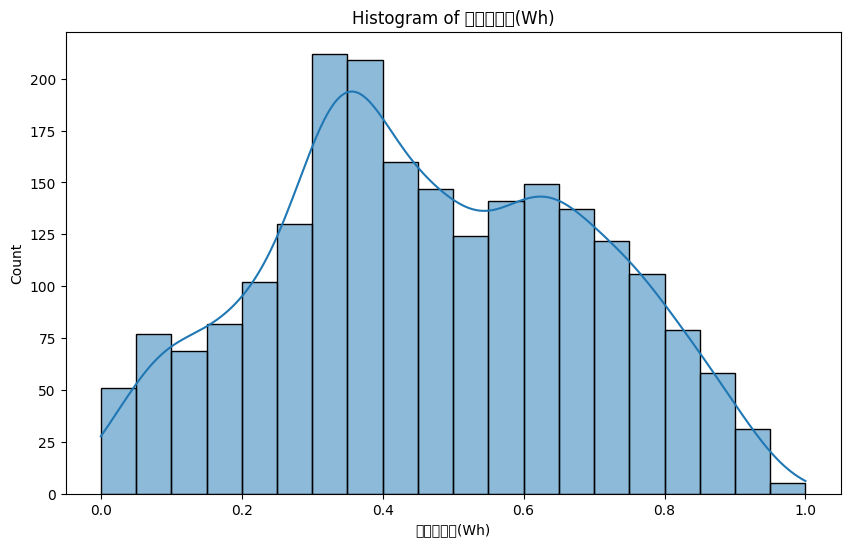

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


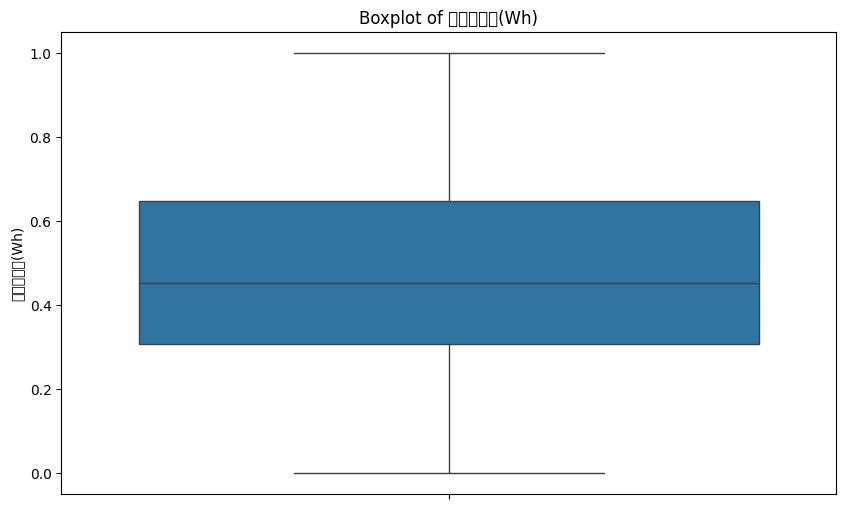

In [21]:
#스케일링 그래프 예시

# 특정 컬럼 히스토그램 시각화
plt.figure(figsize=(10, 6))
sns.histplot(Gwangyang_df_scaled['일일발전량(Wh)'], kde=True)
plt.title('Histogram of 일일발전량(Wh)')
plt.show()

# 특정 컬럼 박스플롯 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(y=Gwangyang_df_scaled['일일발전량(Wh)'])
plt.title('Boxplot of 일일발전량(Wh)')
plt.show()

In [22]:

# 데이터의 중심을 맞춤 (각 피처의 평균을 0으로)
centered_data = Gwangyang_df_scaled - np.mean(Gwangyang_df_scaled, axis=0)


# numpy 배열로 변환 (slicing위해서)
centered_data = np.array(centered_data)

#PCA로 feature reduction

def compute_principal_component_2d(feature):
    # 피처들의 공분산 행렬 계산
    Sigma = np.cov(feature.T)

    # 공분산 행렬의 고유값과 고유벡터 계산
    eig_val, eig_vec = np.linalg.eig(Sigma)

    # 고유값을 내림차순으로 정렬하고 고유값과 고유벡터 정렬
    idx = eig_val.argsort()[::-1]  # 내림차순으로 정렬
    eig_val = eig_val[idx]
    eig_vec = eig_vec[:, idx]

    # 주성분은 가장 큰 고유값에 해당하는 고유벡터들입니다
    principal_component_1 = eig_vec[:, 0]
    principal_component_2 = eig_vec[:, 1]

    return (principal_component_1, principal_component_2)

# 주성분 계산
principal_component_1, principal_component_2 = compute_principal_component_2d(centered_data)
print(f"[*] Principal component 1: {principal_component_1}")
print(f"[*] Principal component 2: {principal_component_2}")


[*] Principal component 1: [-0.11953098 -0.10919718 -0.09295609 -0.12514833 -0.12421979  0.00682371
 -0.22503865 -0.34501396 -0.24775853 -0.27118723 -0.27686695 -0.28704965
 -0.2385769  -0.27816831 -0.25186074 -0.26293705 -0.00251205 -0.00182441
 -0.24383373  0.11646405 -0.1422438   0.0418476   0.15905201  0.1644127
 -0.02728217 -0.11924934  0.17810568 -0.02318474 -0.01232862 -0.08281791
 -0.04368831]
[*] Principal component 2: [-0.30627042 -0.33932755 -0.33028994 -0.28570063 -0.28327871 -0.44899754
 -0.03660798 -0.03899872 -0.0221953  -0.00713013  0.00194297  0.01788868
  0.01438249  0.02465978  0.06491352  0.08764362 -0.09179128 -0.05966071
  0.1058965  -0.04456213  0.23209735  0.14067327 -0.05214238 -0.051172
  0.06400298  0.23265587 -0.03693537  0.05974218  0.0524391   0.28366615
  0.22693532]


C:\Users\user\AppData\Local\Temp\ipykernel_9768\2202076098.py:28: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_9768\2202076098.py:28: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_9768\2202076098.py:28: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from current font.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_9768\2202076098.py:28: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_9768\2202076098.py:28: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_9768\2202076098.py:28: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  plt.tight_layout()
C:\Users\user

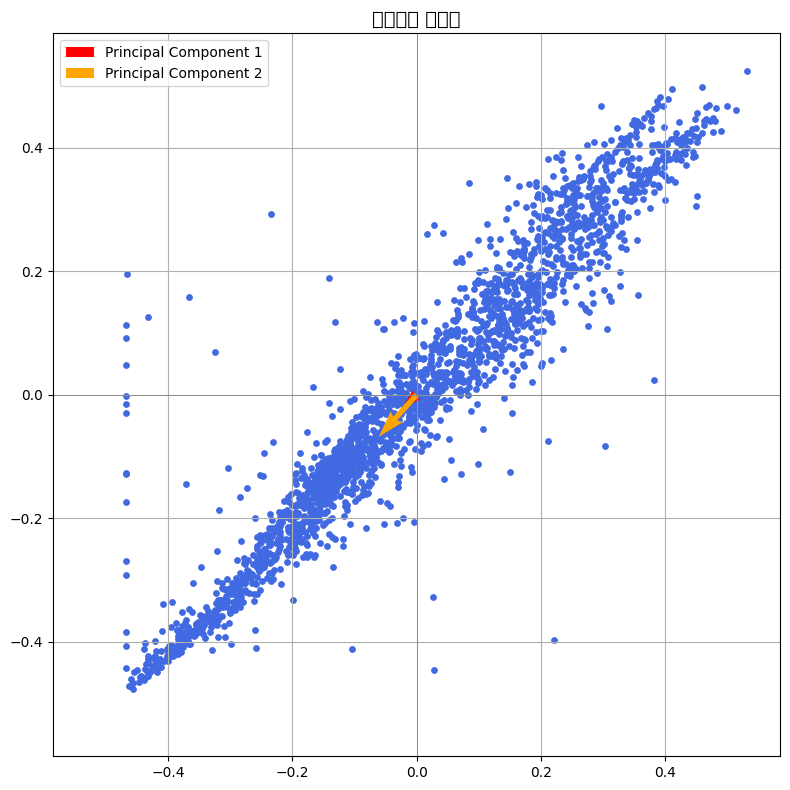

In [23]:
# 데이터와 주성분을 플로팅
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(centered_data[:, 0], centered_data[:, 1], marker='o', s=15, c='royalblue')

# 첫 번째 주성분 플로팅
ax.quiver(0.0, 0.0, principal_component_1[0], principal_component_1[1],
          scale=5, units="xy", color="red", label="Principal Component 1")

# 두 번째 주성분 플로팅
ax.quiver(0.0, 0.0, principal_component_2[0], principal_component_2[1],
          scale=5, units="xy", color="orange", label="Principal Component 2")

ax.set_title("데이터의 주성분", fontsize=14)
ax.legend()

# 좌표 평면을 설정하는 함수
def set_ax_as_coordinate_plane(ax, lim):
    ax.axhline(0, color='gray', linewidth=0.5)
    ax.axvline(0, color='gray', linewidth=0.5)
    ax.set_xlim([-lim, lim])
    ax.set_ylim([-lim, lim])
    ax.grid(True)

# 데이터 범위에 따라 축 범위 설정
data_lim = max(np.max(np.abs(centered_data[:, 0])), np.max(np.abs(centered_data[:, 1]))) * 1.1
set_ax_as_coordinate_plane(ax, data_lim)

plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_9768\436434036.py:34: UserWarning: Glyph 52395 (\N{HANGUL SYLLABLE CEOS}) missing from current font.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_9768\436434036.py:34: UserWarning: Glyph 48264 (\N{HANGUL SYLLABLE BEON}) missing from current font.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_9768\436434036.py:34: UserWarning: Glyph 51704 (\N{HANGUL SYLLABLE JJAE}) missing from current font.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_9768\436434036.py:34: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_9768\436434036.py:34: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_9768\436434036.py:34: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  plt.tight_layout()
C:\Users\use

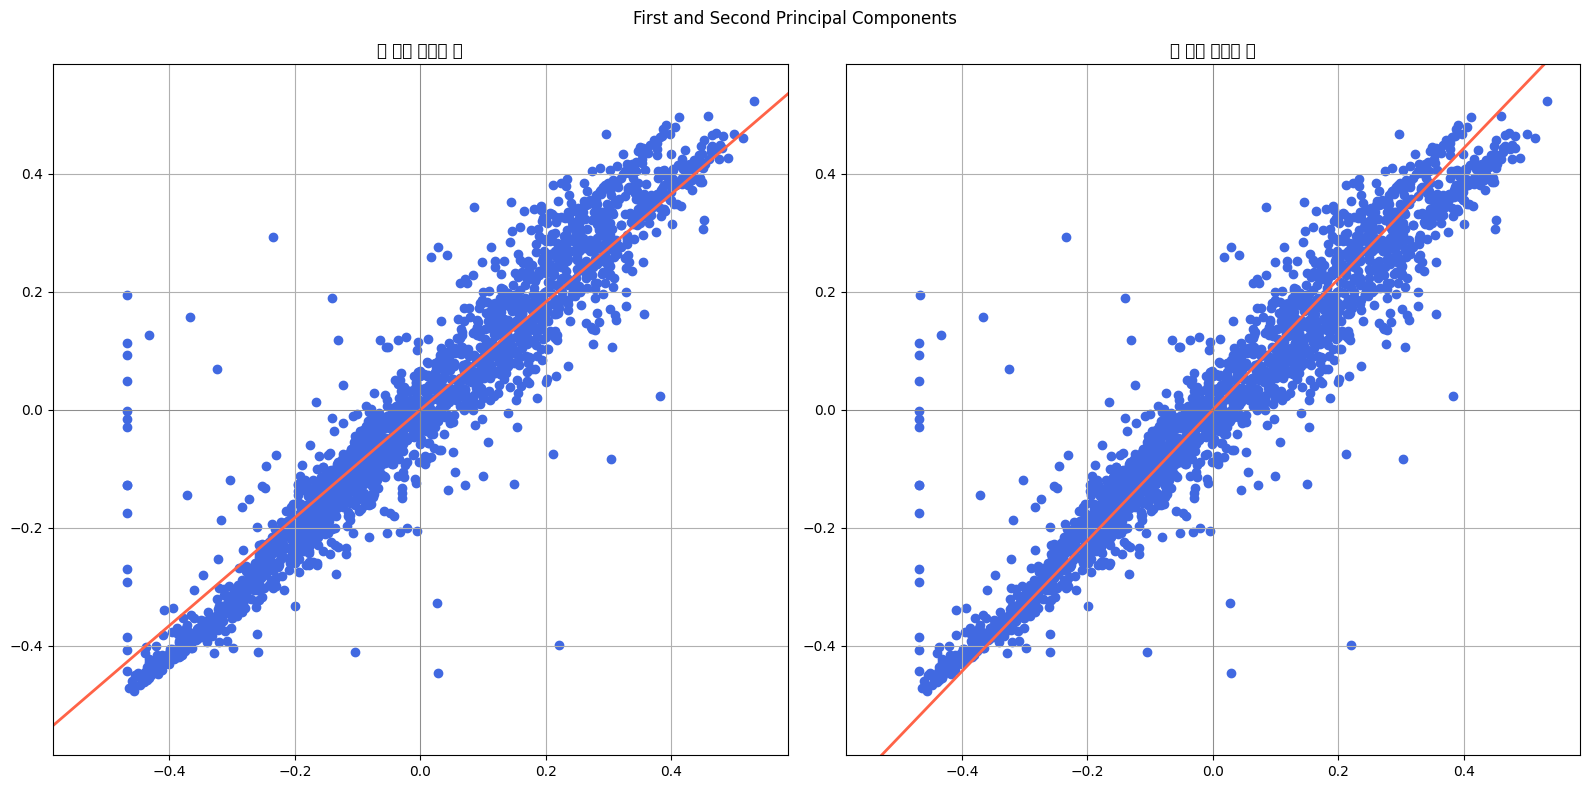

In [24]:
# 서브플롯 생성
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle('First and Second Principal Components')

# 첫 번째 주성분 플롯
axes[0].set_title('첫 번째 주성분 축')
slope1 = principal_component_1[1] / principal_component_1[0]
grid_x1 = np.linspace(-8, 8)
value_y1 = grid_x1 * slope1
axes[0].scatter(centered_data[:, 0], centered_data[:, 1], c='royalblue')
axes[0].plot(grid_x1, value_y1,color='tomato', linewidth=2)
# 두 번째 주성분 플롯
axes[1].set_title('두 번째 주성분 축')
slope2 = principal_component_2[1] / principal_component_2[0]
grid_x2 = np.linspace(-8, 8)
value_y2 = grid_x2 * slope2
axes[1].scatter(centered_data[:, 0], centered_data[:, 1], c='royalblue')
axes[1].plot(grid_x2, value_y2, color='tomato', linewidth=2)

# 데이터 범위에 따라 축 범위 설정
data_lim = max(np.max(np.abs(centered_data[:, 0])), np.max(np.abs(centered_data[:, 1]))) * 1.1

# 좌표 평면을 설정하는 함수
def set_ax_as_coordinate_plane(ax, lim):
    ax.axhline(0, color='gray', linewidth=0.5)
    ax.axvline(0, color='gray', linewidth=0.5)
    ax.set_xlim([-lim, lim])
    ax.set_ylim([-lim, lim])
    ax.grid(True)

set_ax_as_coordinate_plane(axes[0], data_lim)
set_ax_as_coordinate_plane(axes[1], data_lim)

plt.tight_layout()
plt.show()

Explained variance ratio by each principal component:
[0.5464058  0.22772472 0.06492789 0.03797561]


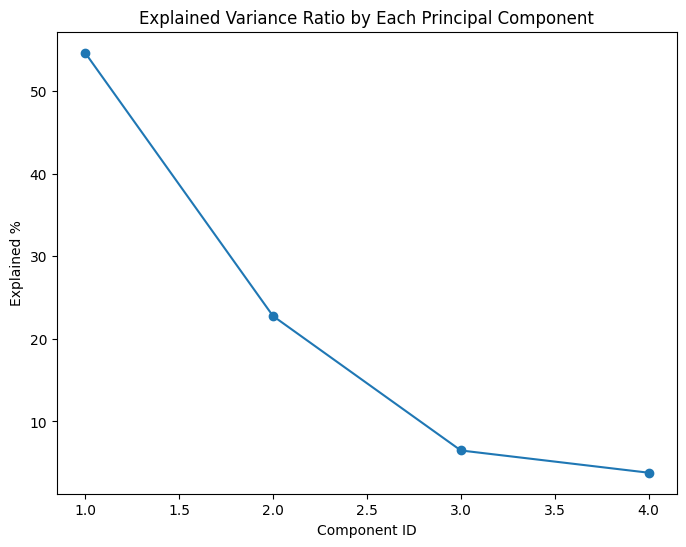

In [25]:
from sklearn.decomposition import PCA

# PCA 설명률 분석
pca_all = PCA(n_components=4)
pca_all.fit(Gwangyang_df_scaled.drop(columns=['일일발전량(Wh)']))
explained_variance_ratio = pca_all.explained_variance_ratio_

print("Explained variance ratio by each principal component:")
print(explained_variance_ratio)

plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, 5), explained_variance_ratio * 100, marker='o')
plt.xlabel("Component ID")
plt.ylabel("Explained %")
plt.title("Explained Variance Ratio by Each Principal Component")
plt.show()

In [38]:
# 데이터 준비

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error, r2_score

# 마지막 31개 데이터 제외 (2017-01-01 ~ 2022-11-30)
train_data = Gwangyang_df_filtered.iloc[:-31]
train_data_scaled = Gwangyang_df_scaled.iloc[:-31]

# 종속 변수와 독립 변수 분리
X = train_data_scaled.drop(columns=['일일발전량(Wh)'])
y = train_data['일일발전량(Wh)']

# train과 test로 데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# PCA 적용하지 않은 regression model

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = model.predict(X_test)

# 모델 평가
# MSE 계산
mse = mean_squared_error(y_test, y_pred)
print("PCA를 적용하지 않은 모델의 MSE:", mse)

# MAE 계산
mae = mean_absolute_error(y_test, y_pred)
print("PCA를 적용하지 않은 모델의 MAE:", mae)

# RMSE 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("PCA를 적용하지 않은 모델의 RMSE:", rmse)

# R-squared 계산
r_squared = r2_score(y_test, y_pred)
print("PCA를 적용하지 않은 모델의 R-squared:", r_squared)

PCA를 적용하지 않은 모델의 MSE: 934986152227.0011
PCA를 적용하지 않은 모델의 MAE: 553997.3344906219
PCA를 적용하지 않은 모델의 RMSE: 966946.8197512215
PCA를 적용하지 않은 모델의 R-squared: 0.9052362200688454


In [40]:
# PCA 적용한 regression model

# PCA 적용
pca = PCA(n_components=0.95)  # 95%의 분산을 설명할 수 있는 주성분만 선택
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# 선형 회귀 모델 생성 및 학습
model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train)

# 테스트 데이터로 예측
y_pred_pca = model_pca.predict(X_test_pca)

# 모델 평가
# MSE 계산
mse_pca = mean_squared_error(y_test, y_pred_pca)
print("PCA를 적용한 모델의 MSE:", mse_pca)

# MAE 계산
mae_pca = mean_absolute_error(y_test, y_pred_pca)
print("PCA를 적용하지 않은 모델의 MAE:", mae_pca)

# RMSE 계산
rmse_pca = np.sqrt(mean_squared_error(y_test, y_pred_pca))
print("PCA를 적용하지 않은 모델의 RMSE:", rmse_pca)

# R-squared 계산
r_squared_pca = r2_score(y_test, y_pred_pca)
print("PCA를 적용하지 않은 모델의 R-squared:", r_squared_pca)

PCA를 적용한 모델의 MSE: 1081140621202.3545
PCA를 적용하지 않은 모델의 MAE: 673438.4413977186
PCA를 적용하지 않은 모델의 RMSE: 1039779.1213533548
PCA를 적용하지 않은 모델의 R-squared: 0.890423006096696


In [48]:
# 2022년 12월 데이터

test_data = Gwangyang_df_filtered.iloc[-31:]
test_data_scaled = Gwangyang_df_scaled.iloc[-31:]

X_test = test_data_scaled.drop(columns=['일일발전량(Wh)'])
y_test = test_data['일일발전량(Wh)']

# 학습된 모델을 사용하여 테스트 데이터에 대한 예측 수행
y_pred = model.predict(X_test)

# 예측값을 정수로 변환
y_pred_int = y_pred.astype(int)

# 예측값과 실제값 비교
comparison_df = pd.DataFrame({'실제값': y_test, '예측값': y_pred_int})
print(comparison_df)

          실제값      예측값
2160  4203000  4195075
2161  5221800  5193560
2162  1990800  2161419
2163  4167000  3759530
2164  4136400  3810652
2165  4791600  4719199
2166  4708800  4909416
2167  4575600  4601263
2168  3108600  3221742
2169  2266200  2265659
2170  4703400  4650980
2171  1636200  1640344
2172  4253400  3843675
2173  5081400  4647248
2174  4915800  4810130
2175  4102200  3668487
2176  3785400  2979001
2177  4980600  4945266
2178  4523400  4776634
2179  4743000  4784076
2180  1643400  1031003
2181  3342600  3470662
2182   815400  2217203
2183  4125600  4955987
2184  5151600  4989502
2185  3830400  3932376
2186  4987800  4861305
2187  4334400  3796763
2188  5013000  4745728
2189  4122000  3871773
2190  4982400  4818692
